<a href="https://colab.research.google.com/github/dinesh2018iitism/Learning-Data-Science-Using-AI-From-PW/blob/main/EDA_3_Assignment_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Amazon Sales Data

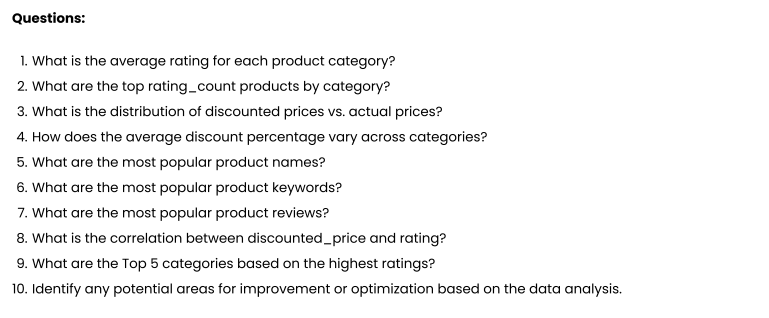

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/amazon.csv'
amazon_data = pd.read_csv(file_path)

amazon_data.columns = amazon_data.columns.str.strip()
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['discount_percentage'] = amazon_data['discount_percentage'].str.replace('%', '').astype(float)
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')
amazon_data['rating_count'] = amazon_data['rating_count'].str.replace(',', '').astype(float)

In [2]:
# 1. Average rating for each product category
avg_rating_category = amazon_data.groupby('category')['rating'].mean().reset_index()
print("Average Rating by Category:")
print(avg_rating_category)


Average Rating by Category:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [3]:
# 2. Top rating_count products by category
top_products_by_category = amazon_data.sort_values(by='rating_count', ascending=False).groupby('category').head(5)
print("Top Rating Count Products by Category:")
print(top_products_by_category[['category', 'product_name', 'rating_count']])

Top Rating Count Products by Category:
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
65    Electronics|HomeTheater,TV&Video|Accessories|C...   
47    Electronics|HomeTheater,TV&Video|Accessories|C...   
684   Electronics|HomeTheater,TV&Video|Accessories|C...   
400   Electronics|Headphones,Earbuds&Accessories|Hea...   
...                                                 ...   
1165  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1450  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
210         Electronics|HomeTheater,TV&Video|Projectors   
299         Electronics|HomeTheater,TV&Video|Projectors   
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                           product_name  rating_count  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
65    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0  
47    Amazon Basics High-Speed HDMI 

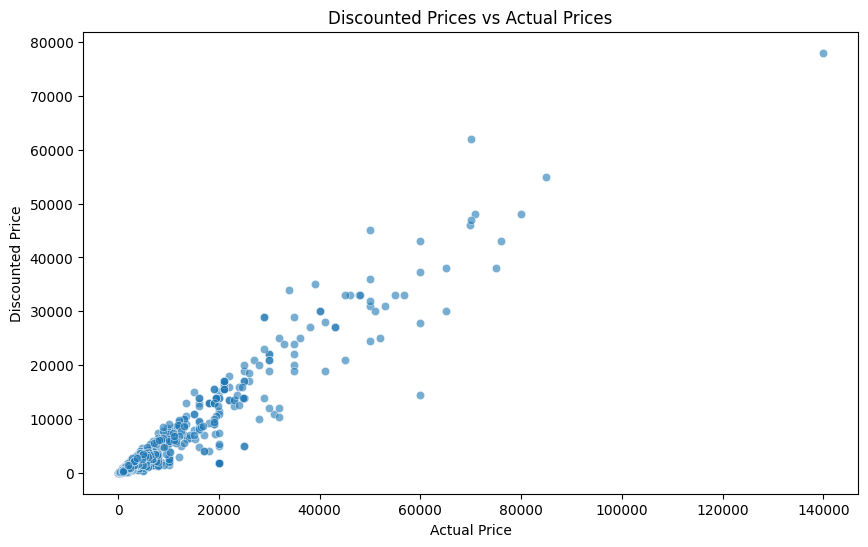

In [4]:
# 3. Distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_data, x='actual_price', y='discounted_price', alpha=0.6)
plt.title('Discounted Prices vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


In [5]:
# 4. Average discount percentage across categories
avg_discount_category = amazon_data.groupby('category')['discount_percentage'].mean().reset_index()
print("Average Discount Percentage by Category:")
print(avg_discount_category)


Average Discount Percentage by Category:
                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [6]:
# 5. Most popular product names
popular_products = amazon_data['product_name'].value_counts().head(10)
print("Most Popular Product Names:")
print(popular_products)


Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                 

In [7]:
# 6. Most popular product keywords
popular_keywords = amazon_data['product_name'].str.split(expand=True).stack().value_counts().head(10)
print("Most Popular Product Keywords:")
print(popular_keywords)

Most Popular Product Keywords:
with        718
for         614
|           457
&           432
USB         342
and         310
Cable       306
-           220
Charging    212
Fast        208
Name: count, dtype: int64


In [8]:
# 7. Most popular product reviews
popular_reviews = amazon_data['review_content'].value_counts().head(10)
print("Most Popular Product Reviews:")
print(popular_reviews)


Most Popular Product Reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phon

Correlation between Discounted Price and Rating:
                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


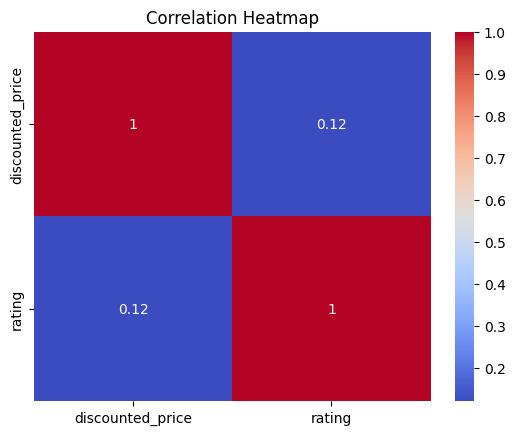

In [9]:
# 8. Correlation between discounted_price and rating
correlation = amazon_data[['discounted_price', 'rating']].corr()
print("Correlation between Discounted Price and Rating:")
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# 9. Top 5 categories based on highest ratings
top_categories_by_rating = amazon_data.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories by Ratings:")
print(top_categories_by_rating)


Top 5 Categories by Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [11]:
# 10. Areas for improvement or optimization
missing_data = amazon_data.isnull().sum()
print("Missing Data in the Dataset:")
print(missing_data)

Missing Data in the Dataset:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
# Identify products with high discount but low ratings
low_rating_high_discount = amazon_data[(amazon_data['discount_percentage'] > 50) & (amazon_data['rating'] < 3)]
print("Products with High Discount but Low Ratings:")
print(low_rating_high_discount[['product_name', 'discount_percentage', 'rating']])


Products with High Discount but Low Ratings:
                                           product_name  discount_percentage  \
545   SHREENOVA ID116 Plus Bluetooth Fitness Smart W...                 86.0   
1243  Personal Size Blender, Portable Blender, Batte...                 55.0   
1286  MR. BRAND Portable USB Juicer Electric USB Jui...                 77.0   
1449  IONIX Tap filter Multilayer | Activated Carbon...                 72.0   

      rating  
545      2.8  
1243     2.3  
1286     2.8  
1449     2.9  
